# WMAZE Model 7
## Models:
### fixed before corr/incorr conditional
### Fixed pairs -- same (AA & CC)
### Fixed pairs -- change (AC & CA)
### "Lost" fixed -- fixed followed by BL trial
### Nonresponse
## Does NOT model:
### Baseline trials
### Conditional trials

## Compares activation for regions of interest using binarized masks:
### Hippocampus (FS labels: hippocampus [17, 53])
### Dorsal caudate (hand-drawn by Mandy)
### Putamen (FS labels: putamen [12, 51])

In [1]:
import os
from glob import glob

sids = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',  
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']


proj_dir = '/home/data/madlab/data/mri/wmaze'
 
mask_filenames = []
cope_files = []

for SID in sids:
    mask_filenames_glob = glob(proj_dir + '/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_' 
                               + SID + '/_anatmask_xfm*/*')
    mask_filenames.append(sorted(mask_filenames_glob))

    subjcopes_glob = glob(proj_dir + '/scndlvl/wmaze_MRthesis/fixed_before_conditional/model7/' 
                          + SID + '/fixedfx/cope_*')
    cope_files.append(sorted(subjcopes_glob))
    if len(cope_files[-1]) == 0:
        print(SID)

## Cell to double-check the array indexing

In [ ]:

print '0. left dlPFC'
print(mask_filenames[0][0]) #lh-dmPFC
print '1. left hippocampus'
print(mask_filenames[0][1]) #lh-HPC
print '2. left mPFC-FS-3'
print(mask_filenames[0][2]) #lh-mPFC-FS-3
print '3. left mPFC-FS'
print(mask_filenames[0][3]) #lh-mPFC-FS
print '4. left mPFC-Lausanne'
print(mask_filenames[0][4]) #lh-mPFC-L
print '5. left motor'
print(mask_filenames[0][5]) #lh-motor
print '6. left caudate'
print(mask_filenames[0][6]) #lh-caudate
print '7. right caudate'
print(mask_filenames[0][7]) #rh-caudate
print '8. right dmPFC'
print(mask_filenames[0][8]) #rh-dmPFC
print '9. right hippocampus'
print(mask_filenames[0][9]) #rh-HPC
print '10. right mPFC-FS-3'
print(mask_filenames[0][10]) #rh-mPFC-FS-3
print '11. right mPFC-fs'
print(mask_filenames[0][11]) #rh-mPFC-FS
print '12. right mPFC-Lausanne'
print(mask_filenames[0][12]) #rh-mPFC-L
print '13. right motor'
print(mask_filenames[0][13]) #rh-motor
print '14. left putamen'
print(mask_filenames[0][14]) #lh-putamen
print '15. right putamen'
print(mask_filenames[0][15]) #rh-putamen

print '-----'

#print '#0 - FFchange_minus_FFsame'
#print(cope_files[0][0]) 
#print '#1 - FFsame_minus_FFchange'
#print(cope_files[0][1])
print '#2 - change'
print(cope_files[8][2]) 
#print '#3 - corr_minus_incorr'
#print(cope_files[0][3])
print '#4 - fixed_before_cond_corr'
print(cope_files[8][4])
print '#5 - fixed_before_cond_incorr'
print(cope_files[8][5])
#print '#6 - incorr_minus_corr'
#print(cope_files[0][6])
#print '#7 - lost'
#print(cope_files[0][7])
print '#8 - same'
print(cope_files[8][8])

#for i in cope_files:
#    print(len(i))

### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [3]:
import nibabel as nb
import pandas as pd
import numpy as np


#Dictionary containing multiple arrays referenced by keywords
all_data = {'subjid':[],
            'lhhp_fixed_before_cond_corr':[], 'rhhp_fixed_before_cond_corr':[], 
            'lhhp_fixed_before_cond_incorr':[], 'rhhp_fixed_before_cond_incorr':[],
            'lhhp_same':[], 'rhhp_same':[], 
            'lhhp_change':[], 'rhhp_change':[],    
            
            'lhmPFC_fixed_before_cond_corr':[], 'rhmPFC_fixed_before_cond_corr':[], 
            'lhmPFC_fixed_before_cond_incorr':[], 'rhmPFC_fixed_before_cond_incorr':[],
            'lhmPFC_same':[], 'rhmPFC_same':[], 
            'lhmPFC_change':[], 'rhmPFC_change':[],    
            
            'lhcaudate_fixed_before_cond_corr':[], 'rhcaudate_fixed_before_cond_corr':[], 
            'lhcaudate_fixed_before_cond_incorr':[], 'rhcaudate_fixed_before_cond_incorr':[],
            'lhcaudate_same':[], 'rhcaudate_same':[], 
            'lhcaudate_change':[], 'rhcaudate_change':[],
            
            'lhputamen_fixed_before_cond_corr':[], 'rhputamen_fixed_before_cond_corr':[], 
            'lhputamen_fixed_before_cond_incorr':[], 'rhputamen_fixed_before_cond_incorr':[],
            'lhputamen_same':[], 'rhputamen_same':[], 
            'lhputamen_change':[], 'rhputamen_change':[]}


# For each interation in the length of subject ids
for i in range(len(sids)):
    #Append the subject id
    all_data['subjid'].append(sids[i])
    #Load the left and right hippocampus mask files using Nibabel 
    lh_hp_img = nb.load(mask_filenames[i][1])
    rh_hp_img = nb.load(mask_filenames[i][9])
    lh_mPFC_img = nb.load(mask_filenames[i][2]) #FreeSurfer-3
    rh_mPFC_img = nb.load(mask_filenames[i][10]) #FreeSurfer-3
    #lh_mPFC_img = nb.load(mask_filenames[i][3]) #FreeSurfer-2
    #rh_mPFC_img = nb.load(mask_filenames[i][11]) #FreeSurfer-2
    lh_caudate_img = nb.load(mask_filenames[i][6])
    rh_caudate_img = nb.load(mask_filenames[i][7])
    lh_putamen_img = nb.load(mask_filenames[i][14])
    rh_putamen_img = nb.load(mask_filenames[i][15])
      
    #Load copes for individual trial types
    fixed_before_cond_corr_img = nb.load(cope_files[i][4])
    fixed_before_cond_incorr_img = nb.load(cope_files[i][5])
    fixed_same_img = nb.load(cope_files[i][8])
    fixed_change_img = nb.load(cope_files[i][2])
 
    ########################
    ### Left Hippocampus ###
    ########################
    
    # fixed_before_cond_corr
    lh_hp_fixed_before_cond_corr_data = fixed_before_cond_corr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_fixed_before_cond_corr'].append(np.mean(lh_hp_fixed_before_cond_corr_data))
    
    # fixed_before_cond_incorr
    lh_hp_fixed_before_cond_incorr_data = fixed_before_cond_incorr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_fixed_before_cond_incorr'].append(np.mean(lh_hp_fixed_before_cond_incorr_data))
      
    # same
    lh_hp_same_data = fixed_same_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_same'].append(np.mean(lh_hp_same_data)) 
    
    # change
    lh_hp_change_data = fixed_change_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_change'].append(np.mean(lh_hp_change_data)) 

    
    #########################
    ### Right Hippocampus ###
    #########################
    
    # fixed_before_cond_corr
    rh_hp_fixed_before_cond_corr_data = fixed_before_cond_corr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_fixed_before_cond_corr'].append(np.mean(rh_hp_fixed_before_cond_corr_data))
    
    # fixed_before_cond_incorr
    rh_hp_fixed_before_cond_incorr_data = fixed_before_cond_incorr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_fixed_before_cond_incorr'].append(np.mean(rh_hp_fixed_before_cond_incorr_data))
      
    # same
    rh_hp_same_data = fixed_same_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_same'].append(np.mean(rh_hp_same_data)) 
    
    # change
    rh_hp_change_data = fixed_change_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_change'].append(np.mean(rh_hp_change_data)) 

    
    ########################
    ###### Left mPFC #######
    ########################
    
    # fixed_before_cond_corr
    lh_mPFC_fixed_before_cond_corr_data = fixed_before_cond_corr_img.get_data()[lh_mPFC_img.get_data() > 0.]
    all_data['lhmPFC_fixed_before_cond_corr'].append(np.mean(lh_mPFC_fixed_before_cond_corr_data))
    
    # fixed_before_cond_incorr
    lh_mPFC_fixed_before_cond_incorr_data = fixed_before_cond_incorr_img.get_data()[lh_mPFC_img.get_data() > 0.]
    all_data['lhmPFC_fixed_before_cond_incorr'].append(np.mean(lh_mPFC_fixed_before_cond_incorr_data))
      
    # same
    lh_mPFC_same_data = fixed_same_img.get_data()[lh_mPFC_img.get_data() > 0.]
    all_data['lhmPFC_same'].append(np.mean(lh_mPFC_same_data)) 
    
    # change
    lh_mPFC_change_data = fixed_change_img.get_data()[lh_mPFC_img.get_data() > 0.]
    all_data['lhmPFC_change'].append(np.mean(lh_mPFC_change_data)) 

    
    #########################
    ###### Right mPFC #######
    #########################
    
    # fixed_before_cond_corr
    rh_mPFC_fixed_before_cond_corr_data = fixed_before_cond_corr_img.get_data()[rh_mPFC_img.get_data() > 0.]
    all_data['rhmPFC_fixed_before_cond_corr'].append(np.mean(rh_mPFC_fixed_before_cond_corr_data))
    
    # fixed_before_cond_incorr
    rh_mPFC_fixed_before_cond_incorr_data = fixed_before_cond_incorr_img.get_data()[rh_mPFC_img.get_data() > 0.]
    all_data['rhmPFC_fixed_before_cond_incorr'].append(np.mean(rh_mPFC_fixed_before_cond_incorr_data))
      
    # same
    rh_mPFC_same_data = fixed_same_img.get_data()[rh_mPFC_img.get_data() > 0.]
    all_data['rhmPFC_same'].append(np.mean(rh_mPFC_same_data)) 
    
    # change
    rh_mPFC_change_data = fixed_change_img.get_data()[rh_mPFC_img.get_data() > 0.]
    all_data['rhmPFC_change'].append(np.mean(rh_mPFC_change_data)) 

    
    ####################
    ### Left Caudate ###
    ####################
    
    # fixed_before_cond_corr
    lh_caudate_fixed_before_cond_corr_data = fixed_before_cond_corr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_fixed_before_cond_corr'].append(np.mean(lh_caudate_fixed_before_cond_corr_data))
    
    # fixed_before_cond_incorr
    lh_caudate_fixed_before_cond_incorr_data = fixed_before_cond_incorr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_fixed_before_cond_incorr'].append(np.mean(lh_caudate_fixed_before_cond_incorr_data))
      
    # same
    lh_caudate_same_data = fixed_same_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_same'].append(np.mean(lh_caudate_same_data)) 
    
    # change
    lh_caudate_change_data = fixed_change_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_change'].append(np.mean(lh_caudate_change_data)) 

    
    #####################
    ### Right Caudate ###
    ##################### 
    
    # fixed_before_cond_corr
    rh_caudate_fixed_before_cond_corr_data = fixed_before_cond_corr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_fixed_before_cond_corr'].append(np.mean(rh_caudate_fixed_before_cond_corr_data))
    
    # fixed_before_cond_incorr
    rh_caudate_fixed_before_cond_incorr_data = fixed_before_cond_incorr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_fixed_before_cond_incorr'].append(np.mean(rh_caudate_fixed_before_cond_incorr_data))
      
    # same
    rh_caudate_same_data = fixed_same_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_same'].append(np.mean(rh_caudate_same_data)) 
    
    # change
    rh_caudate_change_data = fixed_change_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_change'].append(np.mean(rh_caudate_change_data)) 
 
    
    ####################
    ### Left Putamen ###
    ####################
    
    # fixed_before_cond_corr
    lh_putamen_fixed_before_cond_corr_data = fixed_before_cond_corr_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_fixed_before_cond_corr'].append(np.mean(lh_putamen_fixed_before_cond_corr_data))
    
    # fixed_before_cond_incorr
    lh_putamen_fixed_before_cond_incorr_data = fixed_before_cond_incorr_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_fixed_before_cond_incorr'].append(np.mean(lh_putamen_fixed_before_cond_incorr_data))
      
    # same
    lh_putamen_same_data = fixed_same_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_same'].append(np.mean(lh_putamen_same_data)) 
    
    # change
    lh_putamen_change_data = fixed_change_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_change'].append(np.mean(lh_putamen_change_data)) 
  
    
    #####################
    ### Right Putamen ###
    #####################
    
    # fixed_before_cond_corr
    rh_putamen_fixed_before_cond_corr_data = fixed_before_cond_corr_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_fixed_before_cond_corr'].append(np.mean(rh_putamen_fixed_before_cond_corr_data))
    
    # fixed_before_cond_incorr
    rh_putamen_fixed_before_cond_incorr_data = fixed_before_cond_incorr_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_fixed_before_cond_incorr'].append(np.mean(rh_putamen_fixed_before_cond_incorr_data))
      
    # same
    rh_putamen_same_data = fixed_same_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_same'].append(np.mean(rh_putamen_same_data)) 
    
    # change
    rh_putamen_change_data = fixed_change_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_change'].append(np.mean(rh_putamen_change_data)) 
 
    
all_data_df = pd.DataFrame(all_data)

### Combine the two hemispheres to create one regional average

In [4]:
#Hippocampus average for each trial type
all_data_df['hp_fixed_before_cond_corr'] = (all_data_df['lhhp_fixed_before_cond_corr'] + 
                                            all_data_df['rhhp_fixed_before_cond_corr'])/2.
all_data_df['hp_fixed_before_cond_incorr'] = (all_data_df['lhhp_fixed_before_cond_incorr'] + 
                                              all_data_df['rhhp_fixed_before_cond_incorr'])/2.
all_data_df['hp_same'] = (all_data_df['lhhp_same'] + all_data_df['rhhp_same'])/2.
all_data_df['hp_change'] = (all_data_df['lhhp_change'] + all_data_df['rhhp_change'])/2.


#mPFC average for each trial type
all_data_df['mPFC_fixed_before_cond_corr'] = (all_data_df['lhmPFC_fixed_before_cond_corr'] + 
                                              all_data_df['rhmPFC_fixed_before_cond_corr'])/2.
all_data_df['mPFC_fixed_before_cond_incorr'] = (all_data_df['lhmPFC_fixed_before_cond_incorr'] + 
                                                all_data_df['rhmPFC_fixed_before_cond_incorr'])/2.
all_data_df['mPFC_same'] = (all_data_df['lhmPFC_same'] + all_data_df['rhmPFC_same'])/2.
all_data_df['mPFC_change'] = (all_data_df['lhmPFC_change'] + all_data_df['rhmPFC_change'])/2.


#Caudate average for each trial type
all_data_df['caudate_fixed_before_cond_corr'] = (all_data_df['lhcaudate_fixed_before_cond_corr'] + 
                                                 all_data_df['rhcaudate_fixed_before_cond_corr'])/2.
all_data_df['caudate_fixed_before_cond_incorr'] = (all_data_df['lhcaudate_fixed_before_cond_incorr'] + 
                                                   all_data_df['rhcaudate_fixed_before_cond_incorr'])/2.
all_data_df['caudate_same'] = (all_data_df['lhcaudate_same'] + all_data_df['rhcaudate_same'])/2.
all_data_df['caudate_change'] = (all_data_df['lhcaudate_change'] + all_data_df['rhcaudate_change'])/2.


#Putamen average for each trial type
all_data_df['putamen_fixed_before_cond_corr'] = (all_data_df['lhputamen_fixed_before_cond_corr'] + 
                                                 all_data_df['rhputamen_fixed_before_cond_corr'])/2.
all_data_df['putamen_fixed_before_cond_incorr'] = (all_data_df['lhputamen_fixed_before_cond_incorr'] + 
                                                   all_data_df['rhputamen_fixed_before_cond_incorr'])/2.
all_data_df['putamen_same'] = (all_data_df['lhputamen_same'] + all_data_df['rhputamen_same'])/2.
all_data_df['putamen_change'] = (all_data_df['lhputamen_change'] + all_data_df['rhputamen_change'])/2.

In [5]:
%matplotlib inline
from os.path import join
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
from glob import glob
from pylab import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 'WMAZE_007',
        'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012', 'WMAZE_017', 'WMAZE_018',
        'WMAZE_019', 'WMAZE_020', 'WMAZE_021', 'WMAZE_022', 'WMAZE_023', 'WMAZE_024',
        'WMAZE_026', 'WMAZE_027']

all_prop_same = []
all_prop_change = []

for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    dir_file = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub)))   
    dir_file.sort()    
    
    data_run1 = pd.read_table(dir_file[0])
    data_run1 = data_run1[:-3]
    data_run2 = pd.read_table(dir_file[1])
    data_run2 = data_run2[:-3]
    data_run3 = pd.read_table(dir_file[2])
    data_run3 = data_run3[:-3]
    data_run4 = pd.read_table(dir_file[3])
    data_run4 = data_run4[:-3]
    data_run5 = pd.read_table(dir_file[4])
    data_run5 = data_run5[:-3]
    data_run6 = pd.read_table(dir_file[5])
    data_run6 = data_run6[:-3]
    
    all_runs = [data_run1, data_run2, data_run3, data_run4, data_run5, data_run6]    
    data_set = pd.concat(all_runs)
    
    trialtype = data_set['TrialType'].values
    correct = data_set['Correct'].values 
    
    #removing first trial and shifting down 
    trial_shift = trialtype[:-1] 
    trial_shift = np.insert(trial_shift, 0, -1)
    correct_shift = correct[:-1]
    correct_shift = np.insert(correct_shift, 0, -1)
    
    A2_corr = np.where((trialtype == 'A') & (trial_shift == 'A') & (correct == 1))
    C2_corr = np.where((trialtype == 'C') & (trial_shift == 'C') & (correct == 1))
    AC_corr = np.where((trialtype == 'C') & (trial_shift == 'A') & (correct == 1))
    CA_corr = np.where((trialtype == 'A') & (trial_shift == 'C') & (correct == 1))
    same_corr = sorted(np.append(A2_corr, C2_corr))
    change_corr = sorted(np.append(AC_corr, CA_corr))
    
    A2_incorr = np.where((trialtype == 'A') & (trial_shift == 'A') & (correct == 0))
    C2_incorr = np.where((trialtype == 'C') & (trial_shift == 'C') & (correct == 0))
    AC_incorr = np.where((trialtype == 'C') & (trial_shift == 'A') & (correct == 0))
    CA_incorr = np.where((trialtype == 'A') & (trial_shift == 'C') & (correct == 0))
    same_incorr = sorted(np.append(A2_incorr, C2_incorr))
    change_incorr = sorted(np.append(AC_incorr, CA_incorr))
       
    prop_same = len(same_corr)/float(len(same_corr) + len(same_incorr))
    all_prop_same.append(prop_same)
    prop_change = len(change_corr)/float(len(change_corr) + len(change_incorr))
    all_prop_change.append(prop_change)
    
all_data_df['prop_same'] = all_prop_same
all_data_df['prop_change'] = all_prop_change

## Hippocampus Activation: Same vs. Change

##same mean
0.037209879607
##change mean
0.636908759084

##T-test: HPC Same vs. Change
Ttest_relResult(statistic=2.3252461457292246, pvalue=0.031287933971392949)
Cohen's d =  0.834363207217


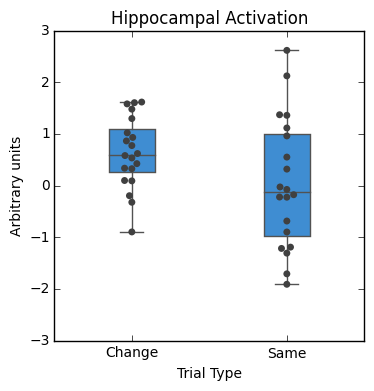

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
#sns.set_style("darkgrid")
from scipy import stats
from math import sqrt

print '##same mean'
print all_data_df['hp_same'].mean()
print '##change mean'
print all_data_df['hp_change'].mean()
print ""

print '##T-test: HPC Same vs. Change'
print stats.ttest_rel(all_data_df['hp_change'], all_data_df['hp_same'])
cohens_d = ((np.average(all_data_df['hp_change']) - np.average(all_data_df['hp_same'])) 
            / (sqrt((np.std(all_data_df['hp_change'], ddof = 1)) 
            ** 2 + np.std(all_data_df['hp_same'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d


N = 2
conditions = ['Change', 'Same']

hp_allsubjs = [all_data_df['hp_change'], 
               all_data_df['hp_same']]

ind = np.arange(N)
pal = ["#30b55c", "#e06243"]
pal = sns.color_palette(pal)

fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25')

ax.set_xticklabels(conditions)
ax.set_xticks(ind)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Arbitrary units")
ax.set_title("Hippocampal Activation")
plt.show()


## mPFC Activation: Same vs. Change

##same mean
-0.0892722070916
##change mean
0.53014203771

##T-test: mPFC Same vs. Change
Ttest_relResult(statistic=1.7543378771840796, pvalue=0.095487570657303483)
Cohen's d =  0.672308568281


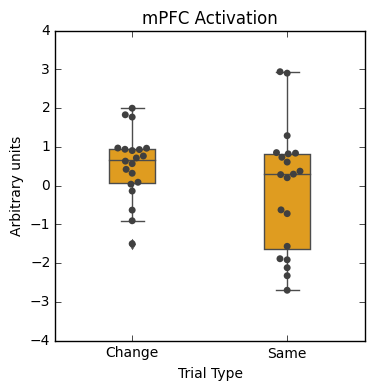

In [8]:
print '##same mean'
print all_data_df['mPFC_same'].mean()
print '##change mean'
print all_data_df['mPFC_change'].mean()
print ""

print '##T-test: mPFC Same vs. Change'
print stats.ttest_rel(all_data_df['mPFC_change'], all_data_df['mPFC_same'])
cohens_d = ((np.average(all_data_df['mPFC_change']) - np.average(all_data_df['mPFC_same'])) 
            / (sqrt((np.std(all_data_df['mPFC_change'], ddof = 1)) 
            ** 2 + np.std(all_data_df['mPFC_same'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d


N = 2
conditions = ['Change', 'Same']

mPFC_allsubjs = [all_data_df['mPFC_change'], 
               all_data_df['mPFC_same']]

ind = np.arange(N)
pal = ["#30b55c", "#e06243"]
pal = sns.color_palette(pal)

fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = mPFC_allsubjs, color = "orange", width = 0.3)
ax2 = sns.swarmplot(data = mPFC_allsubjs, color='.25')

ax.set_xticklabels(conditions)
ax.set_xticks(ind)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Arbitrary units")
ax.set_title("mPFC Activation")
plt.show()


## Caudate Activation: Same vs. Change

##same mean
-0.862536301836
##change mean
0.0598927729327

##T-test: Caudate same vs. change
Ttest_relResult(statistic=2.4108724082156647, pvalue=0.026205253600697524)
Cohen's d =  0.977618405145


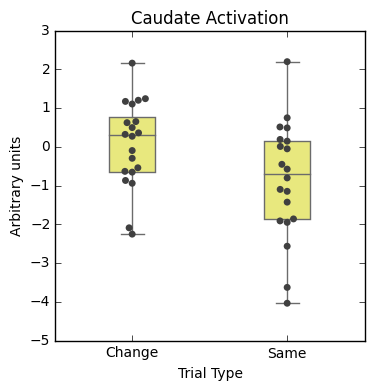

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
#sns.set_style("darkgrid")
from scipy import stats
from math import sqrt

print '##same mean'
print all_data_df['caudate_same'].mean()
print '##change mean'
print all_data_df['caudate_change'].mean()
print ""

print '##T-test: Caudate same vs. change'
print stats.ttest_rel(all_data_df['caudate_change'], all_data_df['caudate_same'])
cohens_d = ((np.average(all_data_df['caudate_change']) - np.average(all_data_df['caudate_same'])) 
            / (sqrt((np.std(all_data_df['caudate_change'], ddof = 1)) 
            ** 2 + np.std(all_data_df['caudate_same'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d

N = 2
conditions = ['Change', 'Same']

caudate_allsubjs = [all_data_df['caudate_change'], 
                    all_data_df['caudate_same']]

ind = np.arange(N)

fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = caudate_allsubjs, color = "#f9f96d", width = 0.3)
ax2 = sns.swarmplot(data = caudate_allsubjs, color='.25')

ax.set_xticklabels(conditions)
ax.set_xticks(ind)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Arbitrary units")
ax.set_title("Caudate Activation")
plt.show()


## Putamen Activation: Same vs. Change

##same mean
0.167640719842
##change mean
0.539587804861

##T-test: Putamen same vs. change
Ttest_relResult(statistic=1.3573951350286018, pvalue=0.19056153663362349)
Cohen's d =  0.5754760191


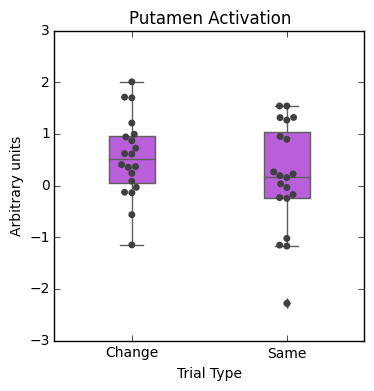

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
#sns.set_style("darkgrid")
from scipy import stats
from math import sqrt

print '##same mean'
print all_data_df['putamen_same'].mean()
print '##change mean'
print all_data_df['putamen_change'].mean()
print ""

print '##T-test: Putamen same vs. change'
print stats.ttest_rel(all_data_df['putamen_change'], all_data_df['putamen_same'])
cohens_d = ((np.average(all_data_df['putamen_change']) - np.average(all_data_df['putamen_same'])) 
            / (sqrt((np.std(all_data_df['putamen_change'], ddof = 1)) 
            ** 2 + np.std(all_data_df['putamen_same'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d

N = 2
conditions = ['Change', 'Same']

putamen_allsubjs = [all_data_df['putamen_change'], 
                    all_data_df['putamen_same']]

ind = np.arange(N)

fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = putamen_allsubjs, color = "#c34aef", width = 0.3)
ax2 = sns.swarmplot(data = putamen_allsubjs, color='.25')

ax.set_xticklabels(conditions)
ax.set_xticks(ind)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Arbitrary units")
ax.set_title("Putamen Activation")
plt.show()


## Scatterplots -- Brain (Fixed 1) --> Behavior (Fixed 2)

### Hippocampus

SAME (0.41092765803672004, 0.07188164081771635)
CHANGE (0.21062673311906346, 0.37273668483658817)


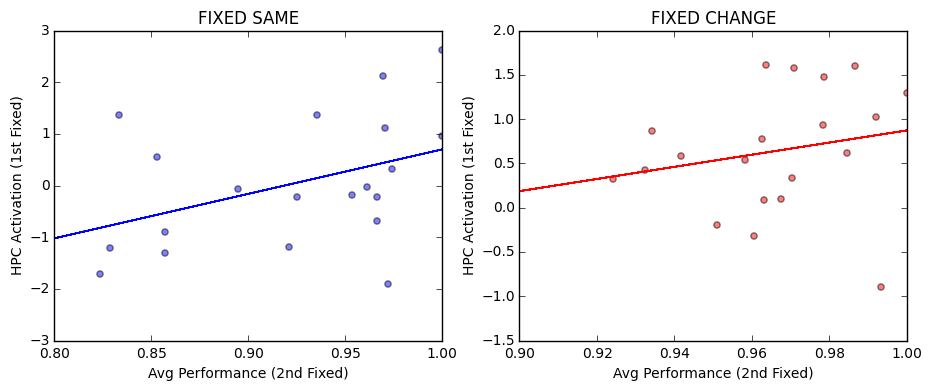

In [11]:
x = all_prop_same
y = all_data_df['hp_same']
x1 = all_prop_change
y1 = all_data_df['hp_change']

fig, (ax, ax1) = plt.subplots(ncols = 2, figsize=(11, 4), sharex = False, sharey = False)
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = 'blue')
ax.scatter(x, y, c = 'blue', alpha = 0.5)
ax.set_ylabel('HPC Activation (1st Fixed)')
ax.set_xlabel('Avg Performance (2nd Fixed)')
ax.set_title('FIXED SAME')
fit1 = np.polyfit(x1, y1, deg = 1)
ax1.plot(y1, fit1[0] * y1 + fit1[1], color = 'red')
ax1.scatter(x1, y1, c = 'red', alpha = 0.5)
ax1.set_ylabel('HPC Activation (1st Fixed)')
ax1.set_xlabel('Avg Performance (2nd Fixed)')
ax1.set_title('FIXED CHANGE')
#print dir(ax)
ax.set_xlim(0.80, 1.0)
ax.set_ylim(-3, 3)
ax1.set_xlim(0.90, 1.0)
ax1.set_ylim(-1.5, 2.0)


print 'SAME', pearsonr(x,y)
print 'CHANGE', pearsonr(x1,y1)

SAME (0.41092765803672004, 0.07188164081771635)
CHANGE (0.21062673311906346, 0.37273668483658817)


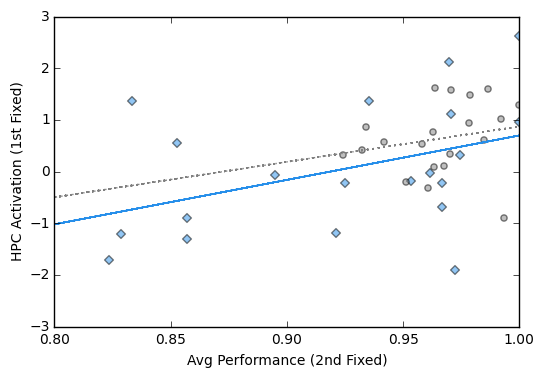

In [12]:
x = all_prop_same
y = all_data_df['hp_same']
x1 = all_prop_change
y1 = all_data_df['hp_change']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = "#278fea")
ax.scatter(x, y, c = "#278fea", alpha = 0.5, marker = 'D')
ax.set_ylabel('HPC Activation (1st Fixed)')
ax.set_xlabel('Avg Performance (2nd Fixed)')
fit1 = np.polyfit(x1, y1, deg = 1)
ax.plot(y1, fit1[0] * y1 + fit1[1], color = 'gray', linestyle = ":")
ax.scatter(x1, y1, c = "gray", alpha = 0.5)
ax.set_ylabel('HPC Activation (1st Fixed)')
ax.set_xlabel('Avg Performance (2nd Fixed)')
ax.set_xlim(0.80, 1.0)
ax.set_ylim(-3, 3)
print 'SAME', pearsonr(x,y)
print 'CHANGE', pearsonr(x1,y1)

CHANGE (0.21062673311906346, 0.37273668483658817)


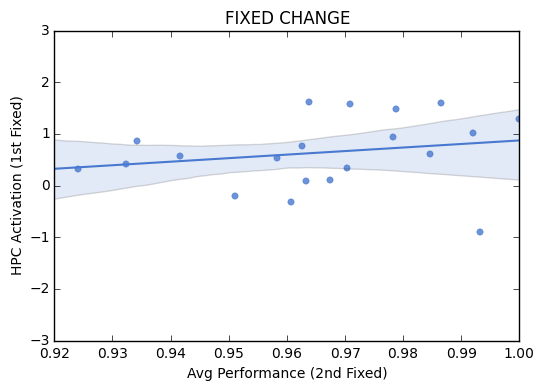

In [18]:
print 'CHANGE', pearsonr(x1,y1)
fig, ax = plt.subplots()
ax = sns.regplot(x = 'prop_change', y = 'hp_change', data=all_data_df)
ax.set_ylabel('HPC Activation (1st Fixed)')
ax.set_xlabel('Avg Performance (2nd Fixed)')
ax.set_title('FIXED CHANGE')
ax.set_ylim(-3,3)
ax.set_xlim(0.92, 1.0)
plt.savefig('/home/arenf001/HPC_fixed_change.png', dpi = 1080)
plt.show()

SAME (0.41092765803672004, 0.07188164081771635)


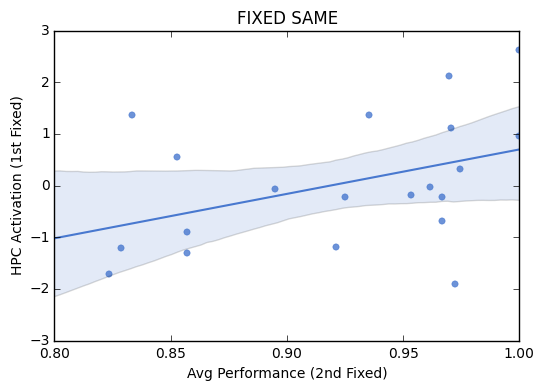

In [20]:
print 'SAME', pearsonr(x,y)
fig, ax = plt.subplots()
ax1 = sns.regplot(x = 'prop_same', y = 'hp_same', data=all_data_df)
ax1.set_ylabel('HPC Activation (1st Fixed)')
ax1.set_xlabel('Avg Performance (2nd Fixed)')
ax1.set_title('FIXED SAME')
ax.set_xlim(0.80, 1.0)
plt.savefig('/home/arenf001/HPC_fixed_same.png', dpi = 1080)
plt.show()

### mPFC

SAME (0.23331678214395729, 0.32217841783052792)
CHANGE (-0.18051672442416036, 0.44629658704012887)


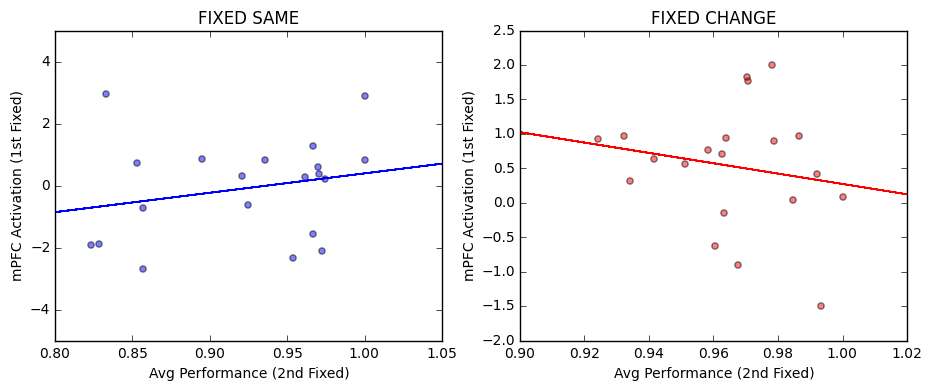

In [21]:
x = all_prop_same
y = all_data_df['mPFC_same']
x1 = all_prop_change
y1 = all_data_df['mPFC_change']

fig, (ax, ax1) = plt.subplots(ncols = 2, figsize=(11, 4), sharex = False, sharey = False)
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = 'blue')
ax.scatter(x, y, c = 'blue', alpha = 0.5)
ax.set_ylabel('mPFC Activation (1st Fixed)')
ax.set_xlabel('Avg Performance (2nd Fixed)')
ax.set_title('FIXED SAME')
fit1 = np.polyfit(x1, y1, deg = 1)
ax1.plot(y1, fit1[0] * y1 + fit1[1], color = 'red')
ax1.scatter(x1, y1, c = 'red', alpha = 0.5)
ax1.set_ylabel('mPFC Activation (1st Fixed)')
ax1.set_xlabel('Avg Performance (2nd Fixed)')
ax1.set_title('FIXED CHANGE')
#print dir(ax)
ax.set_xlim(0.80, 1.05)
ax.set_ylim(-5, 5)
ax1.set_xlim(0.90, 1.02)
ax1.set_ylim(-2, 2.5)


print 'SAME', pearsonr(x,y)
print 'CHANGE', pearsonr(x1,y1)

SAME (0.23331678214395729, 0.32217841783052792)
CHANGE (-0.18051672442416036, 0.44629658704012887)


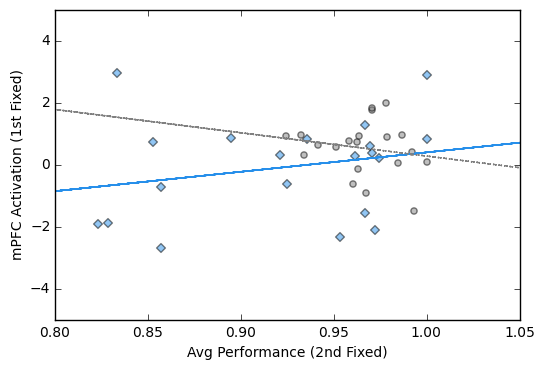

In [22]:
x = all_prop_same
y = all_data_df['mPFC_same']
x1 = all_prop_change
y1 = all_data_df['mPFC_change']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = "#278fea")
ax.scatter(x, y, c = "#278fea", alpha = 0.5, marker = 'D')
ax.set_ylabel('mPFC Activation (1st Fixed)')
ax.set_xlabel('Avg Performance (2nd Fixed)')
fit1 = np.polyfit(x1, y1, deg = 1)
ax.plot(y1, fit1[0] * y1 + fit1[1], color = 'gray', linestyle = ":")
ax.scatter(x1, y1, c = "gray", alpha = 0.5)
ax.set_ylabel('mPFC Activation (1st Fixed)')
ax.set_xlabel('Avg Performance (2nd Fixed)')
ax.set_xlim(0.80, 1.0)
ax.set_ylim(-5, 5)
print 'SAME', pearsonr(x,y)
print 'CHANGE', pearsonr(x1,y1)

CHANGE (-0.18051672442416036, 0.44629658704012887)


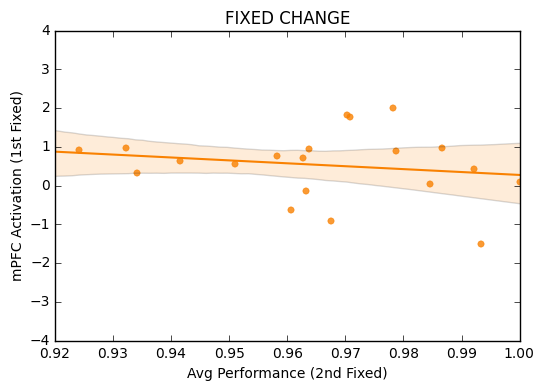

In [23]:
print 'CHANGE', pearsonr(x1,y1)
fig, ax = plt.subplots()
ax = sns.regplot(x = 'prop_change', y = 'mPFC_change', color = '#f98101', data=all_data_df)
ax.set_ylabel('mPFC Activation (1st Fixed)')
ax.set_xlabel('Avg Performance (2nd Fixed)')
ax.set_title('FIXED CHANGE')
ax.set_ylim(-4, 4)
ax.set_xlim(.92, 1)
plt.savefig('/home/arenf001/mPFC_fixed_change.png', dpi = 1080)
plt.show()

SAME (0.23331678214395729, 0.32217841783052792)


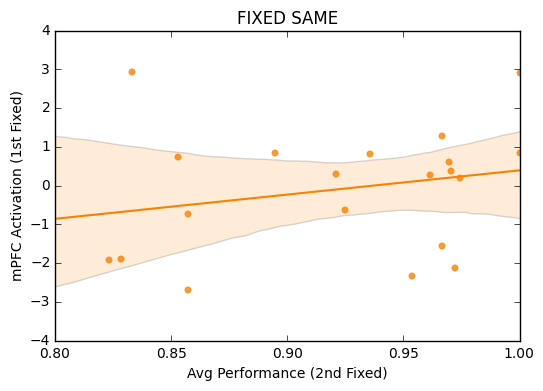

In [24]:
print 'SAME', pearsonr(x,y)
fig, ax = plt.subplots()
ax1 = sns.regplot(x = 'prop_same', y = 'mPFC_same', color = '#f98101', data=all_data_df)
ax1.set_ylabel('mPFC Activation (1st Fixed)')
ax1.set_xlabel('Avg Performance (2nd Fixed)')
ax1.set_title('FIXED SAME')
ax.set_xlim(.80, 1)
ax.set_ylim(-4, 4)
plt.savefig('/home/arenf001/mPFC_fixed_same.png', dpi = 1080)
plt.show()

### Caudate

SAME (0.028034941528657296, 0.90660201464201617)
CHANGE (-0.14135274474283158, 0.55221625302906097)


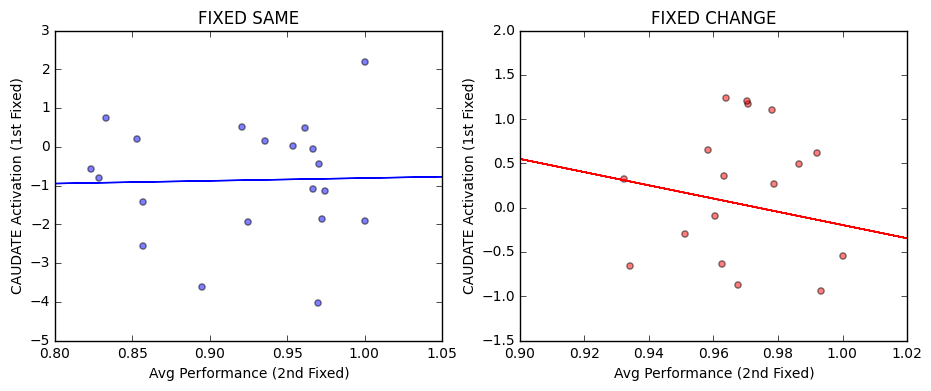

In [41]:
x = all_prop_same
y = all_data_df['caudate_same']
x1 = all_prop_change
y1 = all_data_df['caudate_change']

fig, (ax, ax1) = plt.subplots(ncols = 2, figsize=(11, 4), sharex = False, sharey = False)
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = 'blue')
ax.scatter(x, y, c = 'blue', alpha = 0.5)
ax.set_ylabel('CAUDATE Activation (1st Fixed)')
ax.set_xlabel('Avg Performance (2nd Fixed)')
ax.set_title('FIXED SAME')
fit1 = np.polyfit(x1, y1, deg = 1)
ax1.plot(y1, fit1[0] * y1 + fit1[1], color = 'red')
ax1.scatter(x1, y1, c = 'red', alpha = 0.5)
ax1.set_ylabel('CAUDATE Activation (1st Fixed)')
ax1.set_xlabel('Avg Performance (2nd Fixed)')
ax1.set_title('FIXED CHANGE')
ax.set_xlim(0.80, 1.05)
ax.set_ylim(-5, 3)
ax1.set_xlim(0.90, 1.02)
ax1.set_ylim(-1.5, 2.0)

print 'SAME', pearsonr(x,y)
print 'CHANGE', pearsonr(x1,y1)

SAME (0.028034941528657296, 0.90660201464201617)
CHANGE (-0.14135274474283158, 0.55221625302906097)


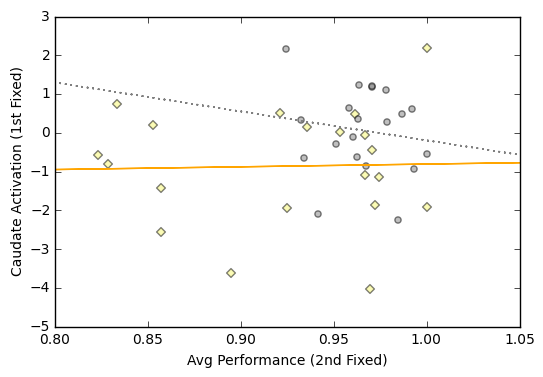

In [42]:
x = all_prop_same
y = all_data_df['caudate_same']
x1 = all_prop_change
y1 = all_data_df['caudate_change']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = "orange")
ax.scatter(x, y, c = "#f9f96d", alpha = 0.5, marker = 'D')
ax.set_ylabel('Caudate Activation (1st Fixed)')
ax.set_xlabel('Avg Performance (2nd Fixed)')
fit1 = np.polyfit(x1, y1, deg = 1)
ax.plot(y1, fit1[0] * y1 + fit1[1], color = 'gray', linestyle = ":")
ax.scatter(x1, y1, c = "gray", alpha = 0.5)
ax.set_xlim(0.80, 1.05)
ax.set_ylim(-5, 3)
print 'SAME', pearsonr(x,y)
print 'CHANGE', pearsonr(x1,y1)

CHANGE (-0.14135274474283158, 0.55221625302906097)


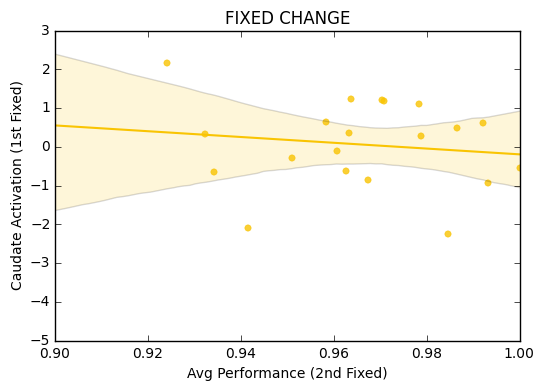

In [43]:
print 'CHANGE', pearsonr(x1,y1)
fig, ax = plt.subplots()
ax = sns.regplot(x = 'prop_change', y = 'caudate_change', data=all_data_df, color = "#f9c402")
ax.set_ylabel('Caudate Activation (1st Fixed)')
ax.set_xlabel('Avg Performance (2nd Fixed)')
ax.set_ylim(-5,3)
ax.set_xlim(0.90, 1.0)
ax.set_title('FIXED CHANGE')
plt.savefig('/home/arenf001/caudate_fixed_change.png', dpi = 1080)
plt.show()

SAME (0.028034941528657296, 0.90660201464201617)


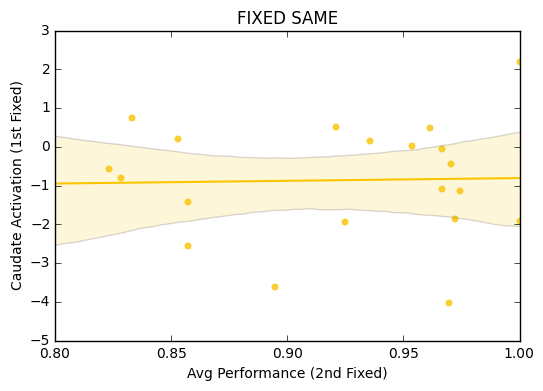

In [44]:
print 'SAME', pearsonr(x,y)
fig, ax = plt.subplots()
ax1 = sns.regplot(x = 'prop_same', y = 'caudate_same', data=all_data_df, color = "#f9c402")
ax1.set_ylabel('Caudate Activation (1st Fixed)')
ax1.set_xlabel('Avg Performance (2nd Fixed)')
ax1.set_title('FIXED SAME')
ax.set_xlim(0.80, 1.0)
plt.savefig('/home/arenf001/caudate_fixed_same.png', dpi = 1080)
plt.show()

### Putamen

SAME (0.53096348770699087, 0.016003222706959315)
CHANGE (0.27049331096484758, 0.24872378726993144)


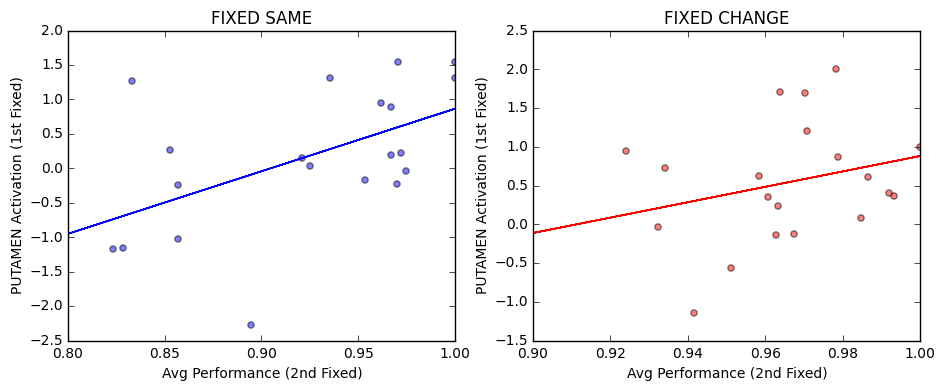

In [45]:
x = all_prop_same
y = all_data_df['putamen_same']
x1 = all_prop_change
y1 = all_data_df['putamen_change']

fig, (ax, ax1) = plt.subplots(ncols = 2, figsize=(11, 4), sharex = False, sharey = False)
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = 'blue')
ax.scatter(x, y, c = 'blue', alpha = 0.5)
ax.set_ylabel('PUTAMEN Activation (1st Fixed)')
ax.set_xlabel('Avg Performance (2nd Fixed)')
ax.set_title('FIXED SAME')
fit1 = np.polyfit(x1, y1, deg = 1)
ax1.plot(y1, fit1[0] * y1 + fit1[1], color = 'red')
ax1.scatter(x1, y1, c = 'red', alpha = 0.5)
ax1.set_ylabel('PUTAMEN Activation (1st Fixed)')
ax1.set_xlabel('Avg Performance (2nd Fixed)')
ax1.set_title('FIXED CHANGE')
ax.set_xlim(0.80, 1.0)
ax.set_ylim(-2.5, 2.0)
ax1.set_xlim(0.90, 1.0)
ax1.set_ylim(-1.5, 2.5)
print 'SAME', pearsonr(x,y)
print 'CHANGE', pearsonr(x1,y1)

SAME (0.53096348770699087, 0.016003222706959315)
CHANGE (0.27049331096484758, 0.24872378726993144)


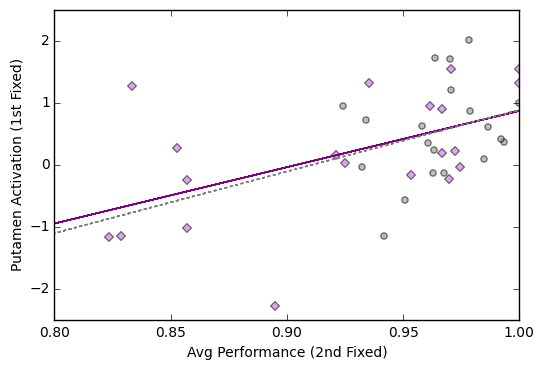

In [46]:
x = all_prop_same
y = all_data_df['putamen_same']
x1 = all_prop_change
y1 = all_data_df['putamen_change']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = "purple")
ax.scatter(x, y, c = "#c34aef", alpha = 0.5, marker = 'D')
ax.set_ylabel('Putamen Activation (1st Fixed)')
ax.set_xlabel('Avg Performance (2nd Fixed)')
fit1 = np.polyfit(x1, y1, deg = 1)
ax.plot(y1, fit1[0] * y1 + fit1[1], color = 'gray', linestyle = ":")
ax.scatter(x1, y1, c = "gray", alpha = 0.5)
ax.set_xlim(0.80, 1.0)
ax.set_ylim(-2.5, 2.5)
print 'SAME', pearsonr(x,y)
print 'CHANGE', pearsonr(x1,y1)

CHANGE (0.27049331096484758, 0.24872378726993144)


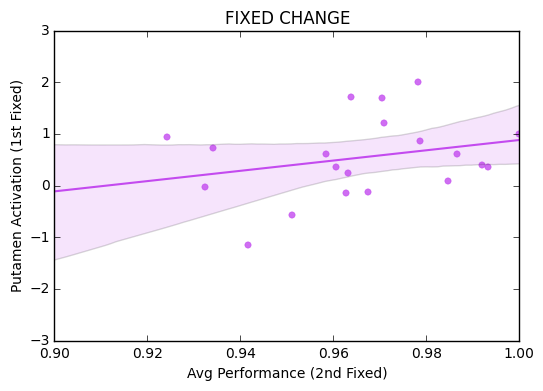

In [47]:
print 'CHANGE', pearsonr(x1,y1)
fig, ax = plt.subplots()
ax = sns.regplot(x = 'prop_change', y = 'putamen_change', data=all_data_df, color = "#c34aef")
ax.set_ylabel('Putamen Activation (1st Fixed)')
ax.set_xlabel('Avg Performance (2nd Fixed)')
ax.set_ylim(-3,3)
ax.set_title('FIXED CHANGE')
ax.set_xlim(0.90, 1.0)
plt.savefig('/home/arenf001/putamen_fixed_change.png', dpi = 1080)
plt.show()

SAME (0.53096348770699087, 0.016003222706959315)


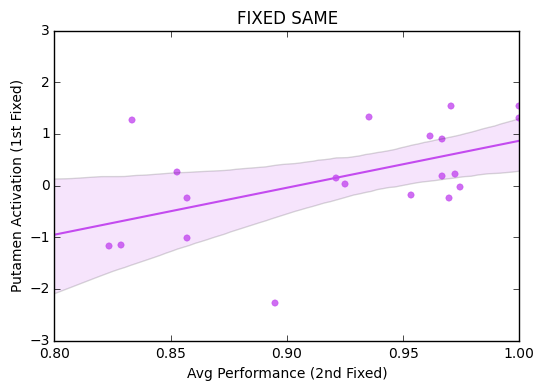

In [50]:
print 'SAME', pearsonr(x,y)
fig, ax = plt.subplots()
ax1 = sns.regplot(x = 'prop_same', y = 'putamen_same', data=all_data_df, color = "#c34aef")
ax1.set_ylabel('Putamen Activation (1st Fixed)')
ax1.set_xlabel('Avg Performance (2nd Fixed)')
ax1.set_title('FIXED SAME')
ax.set_xlim(0.80, 1.0)
plt.savefig('/home/arenf001/putamen_fixed_same.png', dpi = 1080)
plt.show()